In [1]:
#JUAN DIEGO POZO ORTIZ 
# CÓDIGO: 20210679


In [2]:
from  fiona import listlayers
import os

thailandMaps=os.path.join('maps','thailandMaps_4239.gpkg')

#layers in maps
listlayers(thailandMaps)

['airports', 'states', 'municipalities', 'country', 'cities', 'rivers']

In [3]:
import os
import geopandas as gpd

states=gpd.read_file(thailandMaps,layer='states')
municipalities=gpd.read_file(thailandMaps,layer='municipalities')
airports=gpd.read_file(thailandMaps,layer='airports')
rivers=gpd.read_file(thailandMaps,layer='rivers')




In [4]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)

infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [5]:

infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)

infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]


infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [6]:
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [7]:
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)

# subset:
seaports_tha=seaports[seaports['Country Code']=='Thailand'].copy()

# reset indexes
seaports_tha.reset_index(drop=True, inplace=True)

# reprojecting
seaports_tha_4239=seaports_tha.to_crs(4239)

<Axes: >

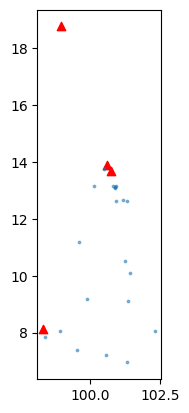

In [33]:
largeAirports=airports[airports['kind']=='large_airport'] 
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_tha_4239.plot(ax=base,alpha=0.5,markersize=3)

In [36]:
#EJERCICIO 1

In [37]:
seaports_tha_4239.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Bongkot Terminal,Thailand,8.050000,102.333333,POINT (102.33685 8.04782)
1,Petchburi Terminal,Thailand,13.166667,100.150000,POINT (100.15331 13.16489)
2,Krabi,Thailand,8.066667,98.916667,POINT (98.91977 8.06452)
3,Bang Saphan,Thailand,11.183333,99.600000,POINT (99.60322 11.18141)
4,Benchamas Terminal,Thailand,10.516667,101.250000,POINT (101.25341 10.51468)


In [35]:
largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Suvarnabhumi Airport,large_airport,13.6811,100.747002,5.0,Bangkok (special administrative area),Bangkok,POINT (100.75039 13.67935)
1,Don Mueang International Airport,large_airport,13.9126,100.607002,9.0,Bangkok (special administrative area),Bangkok,POINT (100.61038 13.91087)
2,Phuket International Airport,large_airport,8.1132,98.316902,82.0,Phuket Province,Phuket,POINT (98.31993 8.11106)
3,Chiang Mai International Airport,large_airport,18.7668,98.962601,1036.0,Chiang Mai Province,Chiang Mai,POINT (98.96585 18.76550)


In [38]:
seaports_tha_4239.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11580\2312517076.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11580\2312517076.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11580\2312517076.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\App

name,Chiang Mai International Airport,Don Mueang International Airport,Phuket International Airport,Suvarnabhumi Airport
portName,,,,
Bang Saphan,0.007611,0.002909,0.003328,0.002749
Bangkok,0.005248,0.000195,0.006045,0.000256
Benchamas Terminal,0.008562,0.003457,0.003792,0.003204
Bongkot Terminal,0.011235,0.006112,0.004017,0.005851
Erawan Terminal,0.009958,0.004870,0.003190,0.004621
Kantang Harbor,0.011381,0.006604,0.001396,0.006401
Khanom,0.009613,0.004766,0.001920,0.004561
Ko Si Chang Terminal,0.005900,0.000775,0.005638,0.000519
Krabi,0.010701,0.006086,0.000602,0.005906


In [39]:
distanceMatrixKM_sea_air= seaports_tha_4239.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11580\4143780132.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11580\4143780132.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11580\4143780132.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\App

In [40]:
SomeStats=pd.DataFrame()
SomeStats['min1'] = distanceMatrixKM_sea_air.apply(lambda row: row.nsmallest(1).values[0], axis=1)
SomeStats['min2'] = distanceMatrixKM_sea_air.apply(lambda row: row.nsmallest(2).values[-1], axis=1)

SomeStats.head(1)

,min1,min2
portName,,
Bang Saphan,0.002749,0.002909


In [ ]:
#EJERCICIO 2

In [41]:
rivers

,NAME,SYSTEM,geometry
0,Mekong,None,"MULTILINESTRING ((101.70515 17.92024, 101.8116..."
1,Salween,None,"MULTILINESTRING ((97.91963 17.57306, 97.96491 ..."


In [56]:
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11580\660976210.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11580\660976210.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\


name,Chiang Mai International Airport,Don Mueang International Airport,Phuket International Airport,Suvarnabhumi Airport
NAME,,,,
Mekong,0.002867,0.004129,0.010319,0.004315
Salween,0.001235,0.004544,0.009470,0.004814


In [44]:
rivers[~rivers.SYSTEM.isna()]

,NAME,SYSTEM,geometry


In [45]:
systems=rivers.dissolve(by='SYSTEM')
systems

,geometry,NAME
SYSTEM,,


In [48]:
systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

systems

KeyError: "['NAME'] not found in axis"

In [49]:
distanceMatrixKM_sys_air=systems.set_index('SYSTEM').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

ValueError: No axis named 1 for object type GeoSeries

In [50]:
mins=distanceMatrixKM_sys_air.idxmin(axis="columns") 
mins


ValueError: No axis named columns for object type GeoSeries

In [51]:
mins.iloc[1]

NameError: name 'mins' is not defined

In [52]:
base=systems.explore()

largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

ValueError: Location values cannot contain NaNs.